<h3>Importando Biblioteca</h3>

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline

<h3>Carregando os Datasets</h3>

In [5]:
columns = ['Sapel lenght','Sepal width' , 'Petal length' , 'Petal width' , 'Class_labels']
#Load the data 
df = pd.read_csv("./iris_datasets/iris_data.csv",names=columns)
df.head(5)


,Sapel lenght,Sepal width,Petal length,Petal width,Class_labels
0,sepal.length,sepal.width,petal.length,petal.width,variety
1,5.1,3.5,1.4,.2,Setosa
2,4.9,3,1.4,.2,Setosa
3,4.7,3.2,1.3,.2,Setosa
4,4.6,3.1,1.5,.2,Setosa


<h3>Removendo o Indice 0</h3>

In [6]:
# Remover a linha com índice 0
df = df.drop(0)  # Drop a linha com índice 0

# Reindexar para manter os índices contínuos
df = df.reset_index(drop=True)

In [7]:
df.head(5)

,Sapel lenght,Sepal width,Petal length,Petal width,Class_labels
0,5.1,3.5,1.4,.2,Setosa
1,4.9,3,1.4,.2,Setosa
2,4.7,3.2,1.3,.2,Setosa
3,4.6,3.1,1.5,.2,Setosa
4,5,3.6,1.4,.2,Setosa


<h3>Visualização dos Datasets</h3>

In [8]:
df.describe()

,Sapel lenght,Sepal width,Petal length,Petal width,Class_labels
count,150,150,150,150,150
unique,35,23,43,22,3
top,5,3,1.4,.2,Setosa
freq,10,26,13,29,50


<h3>Descobrindo o Tipo dos Dados</h3>

In [9]:
df.dtypes

Sapel lenght    object
Sepal width     object
Petal length    object
Petal width     object
Class_labels    object
dtype: object

<h3>Converter Colunas do Tipo Object para Numéricas</h3>

In [10]:
# Converter todas as colunas que parecem numéricas para tipos numéricos
numeric_cols = ["Sapel lenght", "Sepal width", "Petal length", "Petal width"]  # Lista de colunas a converter
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors="coerce")


In [11]:
print(df.describe())


       Sapel lenght  Sepal width  Petal length  Petal width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066     0.435866      1.765298     0.762238
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


In [12]:
df.describe()

,Sapel lenght,Sepal width,Petal length,Petal width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [13]:
df.dtypes

Sapel lenght    float64
Sepal width     float64
Petal length    float64
Petal width     float64
Class_labels     object
dtype: object

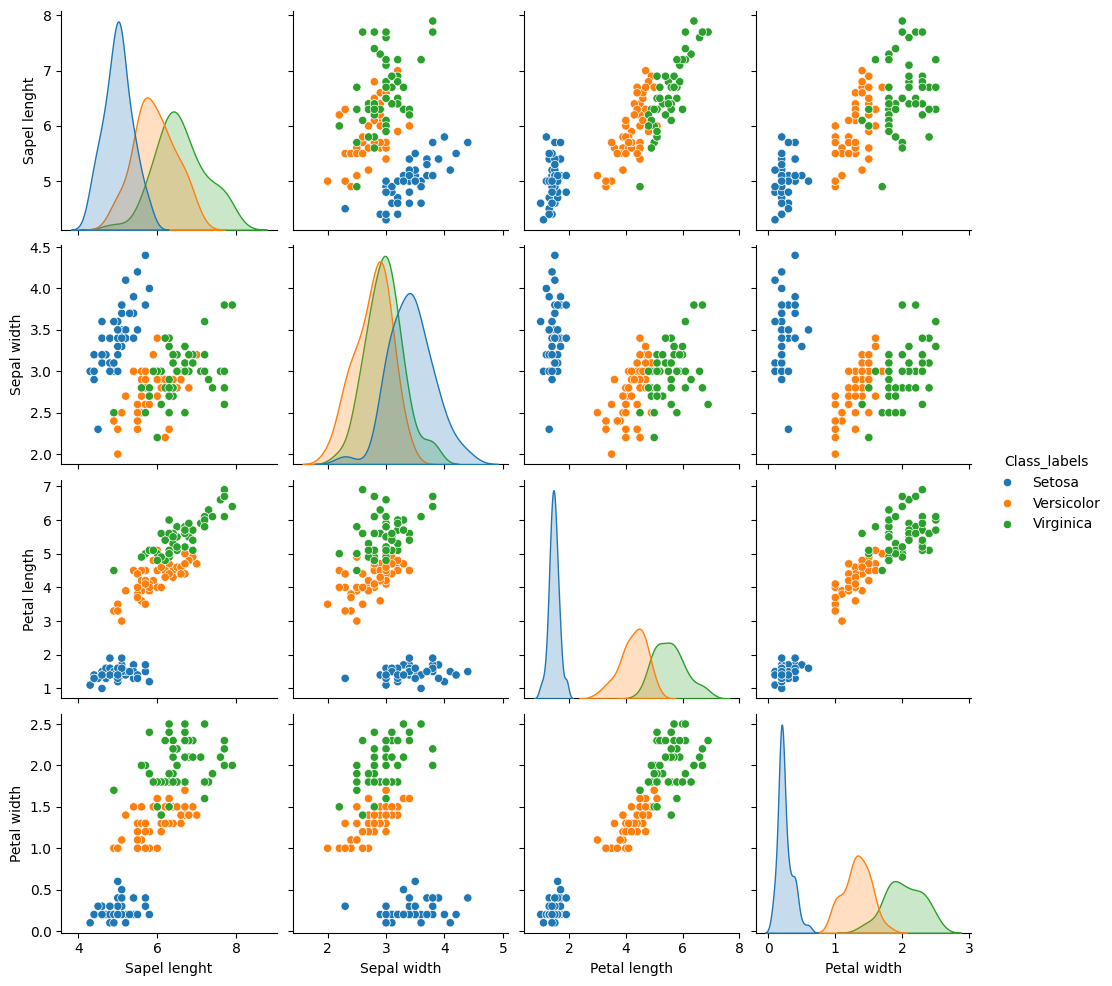

In [14]:
sns.pairplot(df,hue='Class_labels')

<h3>Separando colunas de entrada e coluna de saída</h3>

In [15]:
#Separate features and target
data = df.values
X = data[:,0:4]
Y = data[:,4] 
print(Y)

['Setosa' 'Setosa' 'Setosa' 'Setosa' 'Setosa' 'Setosa' 'Setosa' 'Setosa'
 'Setosa' 'Setosa' 'Setosa' 'Setosa' 'Setosa' 'Setosa' 'Setosa' 'Setosa'
 'Setosa' 'Setosa' 'Setosa' 'Setosa' 'Setosa' 'Setosa' 'Setosa' 'Setosa'
 'Setosa' 'Setosa' 'Setosa' 'Setosa' 'Setosa' 'Setosa' 'Setosa' 'Setosa'
 'Setosa' 'Setosa' 'Setosa' 'Setosa' 'Setosa' 'Setosa' 'Setosa' 'Setosa'
 'Setosa' 'Setosa' 'Setosa' 'Setosa' 'Setosa' 'Setosa' 'Setosa' 'Setosa'
 'Setosa' 'Setosa' 'Versicolor' 'Versicolor' 'Versicolor' 'Versicolor'
 'Versicolor' 'Versicolor' 'Versicolor' 'Versicolor' 'Versicolor'
 'Versicolor' 'Versicolor' 'Versicolor' 'Versicolor' 'Versicolor'
 'Versicolor' 'Versicolor' 'Versicolor' 'Versicolor' 'Versicolor'
 'Versicolor' 'Versicolor' 'Versicolor' 'Versicolor' 'Versicolor'
 'Versicolor' 'Versicolor' 'Versicolor' 'Versicolor' 'Versicolor'
 'Versicolor' 'Versicolor' 'Versicolor' 'Versicolor' 'Versicolor'
 'Versicolor' 'Versicolor' 'Versicolor' 'Versicolor' 'Versicolor'
 'Versicolor' 'Versicolor' 'V

<h3>DIVIDINDO OS DADOS EM TREINAMENTO E TESTE</h3>

In [16]:
# Suponha que X seja seu DataFrame com recursos e Y seja sua coluna de rótulos
from sklearn.model_selection import train_test_split

# Dividir dados em treinamento e teste, com 20% para teste
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)


<h3>MODELO 1: Algoritmo de máquina vetorial $upport</h3>

In [17]:
# Importa o algoritmo Support Vector Machine (SVM)
from sklearn.svm import SVC

# Cria um modelo de SVM
model_svc = SVC()

# Treina o modelo com os dados de treinamento
model_svc.fit(X_train, y_train)


SVC()

In [18]:
# Importar corretamente do Scikit-learn
from sklearn.metrics import accuracy_score  # Corrige a importação

# Calcular a precisão do modelo SVC
prediction1 = model_svc.predict(X_test)  # Previsão com o modelo
print(accuracy_score(y_test,prediction1)*100)

for i in range(len(prediction1)):
    print(y_test[i],prediction1[i])


93.33333333333333
Setosa Setosa
Virginica Virginica
Versicolor Virginica
Virginica Virginica
Virginica Virginica
Setosa Setosa
Versicolor Versicolor
Setosa Setosa
Setosa Setosa
Versicolor Versicolor
Versicolor Versicolor
Setosa Setosa
Setosa Setosa
Virginica Virginica
Versicolor Versicolor
Setosa Setosa
Virginica Virginica
Virginica Virginica
Virginica Virginica
Setosa Setosa
Virginica Virginica
Versicolor Versicolor
Versicolor Virginica
Virginica Virginica
Setosa Setosa
Virginica Virginica
Setosa Setosa
Virginica Virginica
Versicolor Versicolor
Setosa Setosa


<h3>MODELO 2: REGRESSÃO LOGÍSTICA</h3>

In [19]:
#LOGISTIC REGRESSION
from sklearn.linear_model import LogisticRegression
model_LR = LogisticRegression()
model_LR.fit(X_train,y_train)

LogisticRegression()

In [20]:
prediction2 = model_LR.predict(X_test)
#Calculate the accuracy
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,prediction2)*100)

for i in range(len(prediction1)):
    print(y_test[i],prediction1[i])

93.33333333333333
Setosa Setosa
Virginica Virginica
Versicolor Virginica
Virginica Virginica
Virginica Virginica
Setosa Setosa
Versicolor Versicolor
Setosa Setosa
Setosa Setosa
Versicolor Versicolor
Versicolor Versicolor
Setosa Setosa
Setosa Setosa
Virginica Virginica
Versicolor Versicolor
Setosa Setosa
Virginica Virginica
Virginica Virginica
Virginica Virginica
Setosa Setosa
Virginica Virginica
Versicolor Versicolor
Versicolor Virginica
Virginica Virginica
Setosa Setosa
Virginica Virginica
Setosa Setosa
Virginica Virginica
Versicolor Versicolor
Setosa Setosa


<h3>MODELO3:CLASSIFICADOR DE ÁRVORE DE DECISÃO</h3>

In [21]:
# Importar o classificador de árvore de decisão do Scikit-learn
from sklearn.tree import DecisionTreeClassifier
model_DTC = DecisionTreeClassifier()
model_DTC.fit(X_train,y_train)

DecisionTreeClassifier()

In [22]:
# Corrigir o nome do modelo, se necessário
prediction3 = model_svc.predict(X_test)  # Use a variável correta para o modelo SVC

# Calculando a precisão com a importação correta
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, prediction3)) 


0.9333333333333333


In [23]:
#A detailed classification report 
from sklearn.metrics import classification_report
print(classification_report(y_test,prediction2))

              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        11
  Versicolor       1.00      0.75      0.86         8
   Virginica       0.85      1.00      0.92        11

    accuracy                           0.93        30
   macro avg       0.95      0.92      0.92        30
weighted avg       0.94      0.93      0.93        30



In [30]:
X_new = np.array([[3,2,1,0.2],[4.9,2.2,3.8,1.1],[5.3,2.5,4.6,1.9]])
#Prediction of the species from the input vector 
prediction = model_svc.predict(X_new)
print("Prediction of Species {}".format(prediction))

Prediction of Species ['Setosa' 'Versicolor' 'Virginica']
